# Predição de Série Temporal

**Questão 4 -** Utilize a rede neural perceptron de múltiplas camadas para fazer a predição de um passo, até predição de três passos, da série temporal _x(n) = sen(n + sen²(n))_ . Avalie o desempenho mostrando para cada caso os erros de predição.

#### Importação das bibliotecas

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import statistics
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
X = []
y = []

X= np.loadtxt('./data_files/data_x.txt', dtype=float, delimiter=',', encoding='bytes')
y= np.loadtxt('./data_files/data_y.txt', dtype=float, delimiter=',', encoding='bytes')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [4]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
ann = tf.keras.models.Sequential()

In [6]:
ann.add(tf.keras.layers.Dense(units=5, activation='relu'))
ann.add(tf.keras.layers.Dense(units=7, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=3, activation='tanh'))

In [7]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [8]:
history = ann.fit(X_train, y_train, validation_split=0.2, epochs=1000, batch_size=50, verbose=2)

Epoch 1/1000
6/6 - 0s - loss: 0.2770 - accuracy: 0.3828 - val_loss: -6.5369e-01 - val_accuracy: 0.4219
Epoch 2/1000
6/6 - 0s - loss: 0.0809 - accuracy: 0.3984 - val_loss: -9.7407e-01 - val_accuracy: 0.4531
Epoch 3/1000
6/6 - 0s - loss: -3.5580e-02 - accuracy: 0.4219 - val_loss: -9.7558e-01 - val_accuracy: 0.4531
Epoch 4/1000
6/6 - 0s - loss: -1.5530e-01 - accuracy: 0.4375 - val_loss: -1.1187e+00 - val_accuracy: 0.4531
Epoch 5/1000
6/6 - 0s - loss: -2.6053e-01 - accuracy: 0.4453 - val_loss: -1.1806e+00 - val_accuracy: 0.4531
Epoch 6/1000
6/6 - 0s - loss: -3.7439e-01 - accuracy: 0.4492 - val_loss: -1.2837e+00 - val_accuracy: 0.4531
Epoch 7/1000
6/6 - 0s - loss: -5.4321e-01 - accuracy: 0.4531 - val_loss: -1.4954e+00 - val_accuracy: 0.4531
Epoch 8/1000
6/6 - 0s - loss: -7.5084e-01 - accuracy: 0.4570 - val_loss: -1.7075e+00 - val_accuracy: 0.4531
Epoch 9/1000
6/6 - 0s - loss: -8.8621e-01 - accuracy: 0.4570 - val_loss: -1.9980e+00 - val_accuracy: 0.4688
Epoch 10/1000
6/6 - 0s - loss: -1.0228

In [9]:
y_pred = ann.predict(X_test)
acc = statistics.mean(history.history['accuracy'])

print(acc)

0.8818046875


In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm= confusion_matrix(
    y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)

[[38  0  1]
 [ 1 11  0]
 [ 0  0 29]]


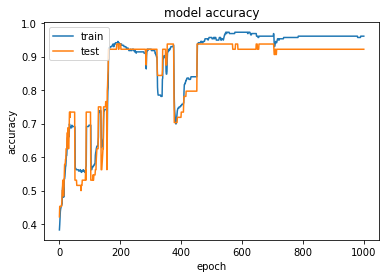

In [11]:
# summarize history for accuracy
plt.figure(1)  

# summarize history for accuracy  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left') 

In [12]:
ann.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error'])
history = ann.fit(X_train, y_train, validation_split=0.2, epochs=1000, batch_size=10, verbose=0)

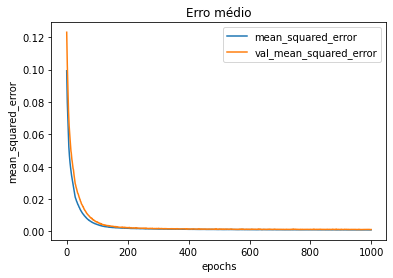

In [13]:
plt.plot(history.history["mean_squared_error"], label="mean_squared_error")
plt.plot(history.history["val_mean_squared_error"], label="val_mean_squared_error")
plt.title('Erro médio')
plt.ylabel('mean_squared_error')
plt.xlabel('epochs')
plt.legend()